# **VGG16**

Vgg16 modeli, içerisinde katmanların hazır olduğu eğitilmemiş ağırlıktır. Vgg16 modeli mimarisinde de olduğu gibi maksimum 1000 sınıf verisi alabilmektedir. Vgg16 modeli için sınıflandırmak için kullanıldığından bahsedebiliriz.

Son katmanda da görüldüğü gibi 1000 adet model çıkışı bulundurmaktadır.

Vgg16 modeli için verilen veri setlerinde birisi önceden eğitilmiş ve diğeri eğitilmesi için hazırlanmış katman ağırlık değerlerini bulundurmaktadır.

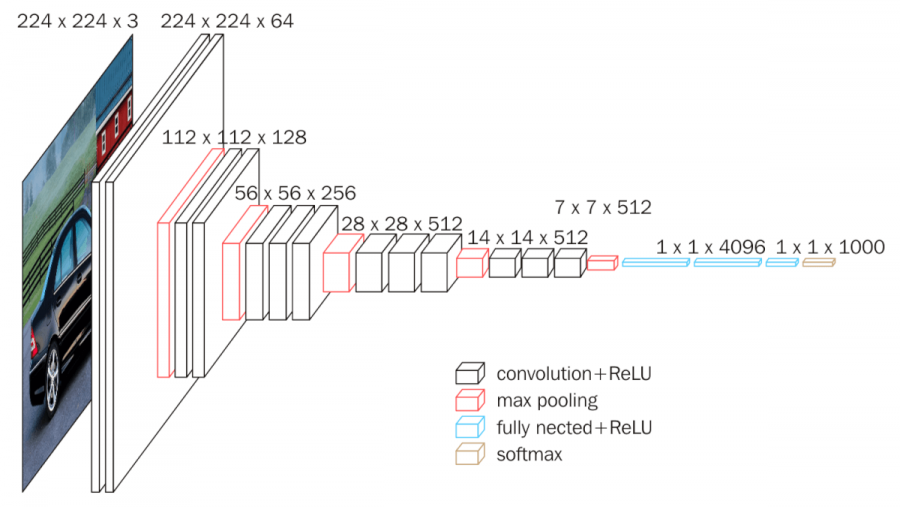

**Şekil 1-)** VGG16 Model Mimarisi

## **Eğitilmiş Modelin Hazırlanması ve Kullanılması**

Hazır model ya da önceden eğitilmiş modelin kullanımı için birkaç şey eklememiz gerekecektir. Bunlardan birisi Keras'ı kullanabilmek için tensorflow ya da direkt Keras modülünü kurmamız yetecektir. 

**Not:** Keras modülünü tensorflow modülü üzerinden çalıştırmak çalışması açısından daha iyi olduğu söylenebilir. O yüzden Keras'ı Tensorflow üzerinden çalıştıracağız.

### **Google Drive Eklenmesi**

Öncelikle veri setimiz Drive üzerinde olduğu için projemize Google'ın sağlamış olduğu Colab modülü yardımıyla Drive modülünü kuruyoruz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Tensorflow Kütüphanesi Eklenmesi**

Tensorflow eklemek için aşağıdaki kodu çalıştırmak yeterlidir.

In [ ]:
import tensorflow as tf

### **Verilerin Eklenmesi**

Verilerin eklenebilmesi için Drive üzerinde belirtilen klasör içerisindeki ağırlık dosyalarını alıyoruz. Programın çalıştırılabilmesi için Drive üzerinde DATASETS dizini içerisinde MAKINA adlı klasörü alıyoruz. Bu klasor içerisinde yer alan ağırlıkları os kütüphanesi yardımıyla bir string olarak dosya lokasyonlarını alıyoruz.

In [ ]:
import os 
projectPath = os.path.join('drive','MyDrive','DATASETS','MAKINA')
dataPath = os.path.join(projectPath,'data')
classFile = os.path.join(dataPath,'imagenet_class_index.json')
weightFile = os.path.join(dataPath,'vgg16_weights_tf_dim_ordering_tf_kernels.h5')
weight_notopPath = os.path.join(dataPath, 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

### **Sınıfların Alınması**

Hazır eğitilmiş modelde yer alan sınıf verilerini almak için dosya lokasyonunu open metodu ile okuma modunda açıyoruz ve içeriğini json kütüphanesi yardımıyla dictonary nesnesi olarak alıyoruz ve dosyamızı kapatıyoruz.

In [ ]:
import json
json_file = open(classFile,'r')
classes = json.loads(json_file.read())
json_file.close()
print(f"Sınıf Sayısı: {len(classes.keys())}")

Sınıf Sayısı: 1000


### **VGG16 ile Ağırlıkların Girilmesi**

VGG16 Modeli için verilen ağırlıkları keras modülü içerisinde yer alan applications dizini içerisindeki vgg16 modülünün içerisinden VGG16 nesnesini alıyoruz. Nesneyi aldıktan sonra verilen eğitilmiş ağırlıkları girerek modeli almış bulunuyoruz.



```
# Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
                                                                 
 block4_conv1 (Conv2D)       (None, 28, 28, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 predictions (Dense)         (None, 1000)              4097000   
                                                                 
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
```



**Şekil 2-)** VGG16 Model Katmanları

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights = weightFile)



model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### **Model Testi**

Girdiğimiz ağırlık sonucunda aldığımız modeli predict metodu yardımıyla tahmin etmesini sağlayacağız. Datasets klasörü içerisinde 4 adet test resmi yer almaktadır ve dosya isimleri görselle ilişkilidir. Görselleri cv2 modülü ile yeniden boyutlandırıyoruz. Numpy listesine çevirdikten sonra BGR renk kodlarını RGB olarak çeviriyoruz ve boyutunu ayarlıyoruz. Boyutunun ayarlamamızın sebebi tek bir resim olmasından dolayı modelin çıkış boyutlarına uymadığı ve bunu uydurmak açısından boyutunu (224,224,3) boyutundan (1,224,224,3) boyutuna göre değişiklik yapıyoruz. Görseli liste olarak aldıktan sonra tahmin ettiriyoruz ve elimize sınıf sayısı kadar veri bulunan bir liste gelecektir. Bunun sebebi listenin bir kategorik anlam taşıması ve ona göre kaçıncı indiste sınıf verisini taşıyorsa onu numpy kütüphanesinden argmax metoduyla toplayarak sınıf numarasını elde ediyoruz.

Elde ettiğimiz veriyi aldığımız sınıflar içerinde arayarak tahmin sonucunu okunur bir biçimde yazdırıyoruz.

Teyit etmek için de görsellerdeki isimlerin yanına yazdırarak görüyoruz.

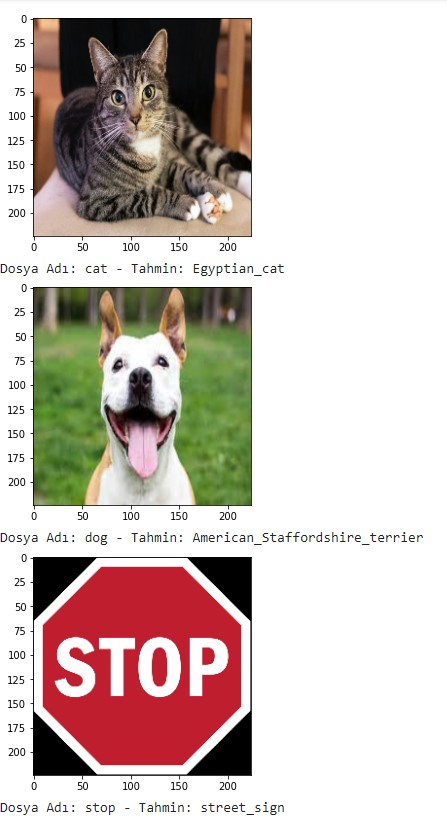

**Şekil 3-)** Tahmin Sonuçları

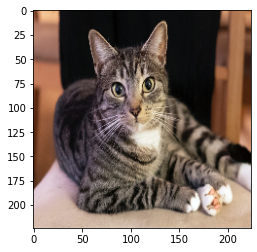

Dosya Adı: cat - Tahmin: Egyptian_cat


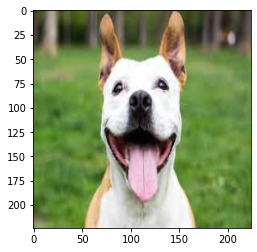

Dosya Adı: dog - Tahmin: American_Staffordshire_terrier


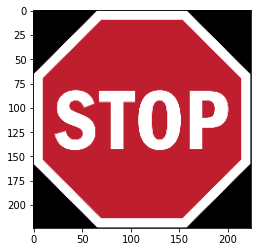

Dosya Adı: stop - Tahmin: street_sign


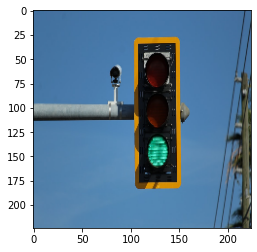

Dosya Adı: traffic_light - Tahmin: traffic_light


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset = os.path.join(projectPath,'datasets')



for image in os.listdir(dataset):
  path = os.path.join(dataset,image)
  img = cv2.imread(path)
  img = cv2.resize(img,(224,224))
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
  img = img.reshape(1,224,224,3)
  
  predict = model.predict(img)
  result = np.argmax(predict)
  fileName = image.split('.')[0]
  plt.imshow(show_img)
  plt.show()
  
  print(f"Dosya Adı: {fileName} - Tahmin: {classes[str(result)][1]}")

### **Model Eğitim Bilgilerinin Alınması**

Modelin eğitilmiş olmasından dolayı eğitim aşamasında elde edilen başarı ve kayıp verilerini alamamaktayız.

In [ ]:
history = model.history

print(history.history)

{}


## **VGG16 İle Model Eğitimi**

Verilen diğer ağırlık için benzer yöntemler kullanarak model yaratmaya çalışıyoruz.



### **Modelin Hazırlanması**

**Not:** Hazır model ile eğitilecek model arasındaki farklardan birisi eğitilende 16 eğitilmemişte 13 katman yer almaktadır ve bu sebepten dolayı yeni model olduğunu göstermemiz gerekmektedir. 

Modelin lokasyonunu girdikten sonra giriş tensörünü ve katmanları dahil etmesini sağladıktan sonra bunun yeni bir model olduğunu anlayacaktır. 

**Not:** Giriş tensörü için eğitilecek verilerin boyutuyla tensör boyutunun aynı olması gerekmektedir.

Bunları yaptıktan sonra modelin katmanlarını alarak bu katmanlara istenilen eklemeleri yaparak ortaya bir model çıkması sağlanacaktır. 
Modele öncelikle elde edilen çıkış boyutlarını tek boyuta indirgeyerek başlanmalıdır. Sebebi sınıflandırma algoritmalarında çıkacak olan verinin bir sınıf olması ve aynı boyutta başka verinin çıkacak olmamasıdır. 

İndirgedikten sonraki aşamada ise gizli katmanları azaltmak için genelde tek boyuta indirgenmiş çıkışın yarısı alınacak şekilde gizli katmanlar azaltılmalıdır ve sonuç, elimizdeki verilere göre yakın olmalıdır. Katman çıktılarını genelde ikiye bölerek sonuca indirgedikten sonra son katmanda sınıf sayısı kadar verilmelidir. Bunun sebebi kategorik olarak alacağı içindir. Yani anlatmak gerekirse bilgisayar 0 ve 1 ile çalışır ve sonuç verir. Sklearn kütüphanesindeki HotLabelEncoding gibidir. Daha da açmak gerekirse içerisine alacağı 80 tane 1 ve geri kalan 11 tane 0 verisinin getireceği sonuç 80. sınıf numarasında olmalıdır diyebiliriz.

Bunları yaptıktan sonra bir model oluşturuyoruz ve modele giriş ve çıkış katmanları verdikten sonra modelin katmanlarını inceliyoruz.



```
# Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 8, 8, 256)         590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 8, 8, 256)         590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 4, 4, 256)         0         
                                                                 
 block4_conv1 (Conv2D)       (None, 4, 4, 512)         1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 4, 4, 512)         2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 4, 4, 512)         2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 2, 2, 512)         0         
                                                                 
 block5_conv1 (Conv2D)       (None, 2, 2, 512)         2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 2, 2, 512)         2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 2, 2, 512)         2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 91)                46683     
                                                                 
=================================================================
Total params: 15,286,683
Trainable params: 571,995
Non-trainable params: 14,714,688
```



**Şekil 4-)** Eğitilecek Modelin Katmanları

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense,Input , Conv2D

vgg = VGG16(weights= weight_notopPath,include_top=False, input_tensor=Input(shape=(32, 32, 3)))
vgg.trainable = False
outputs = vgg.output

flatten = Flatten()(outputs)

bboxHead = Dense(512,activation="relu")(flatten)
bboxHead = Dense(512, activation="relu")(bboxHead)

bboxHead = Dense(91, activation="sigmoid")(bboxHead)




diger_model = Model(inputs=vgg.input, outputs=bboxHead)

diger_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### **Veri Setlerinin Ön İşleme Sokulması**

Modelde verdiğimiz giriş boyutlarına uygun alınması gereken verilerin işlenmesi gerekmektedir. Mesela verilerin boyutlarının aynı olması gerekmektedir. 

Başlamadan önce veri setinin konumunun alınması gerekmektedir. Konum alındıktan sonra etiket şeklinde ayrılmış klasörlere tek tek girilmeli ve içerisindeki görseller numpy listesi şeklinde alınmalıdır. Bunu yapabilmek için OpenCv kütüphanesi yardımıyla resmi okuduktan sonra alınan görselin renk kodları cv2 kütüphanesinde hazırda BGR yani mavi, yeşil ve kırmızı olarak gelmektedir. Bunu değiştirmek için cvtColor metodu ile bilinen RGB renk koduna dönüştürüyoruz.

Renk dönüşümü sonrası resimleri modeldeki gibi 32x32 boyutlarına dönüştürdükten sonra klasör isimlerini tamsayı olarak sınıflar listesinde, resimleri de veri listesinde tutuyoruz.



```
Yüklenen Resim - 21249
Yüklenen Sınıf - 21249
Yükleme Süresi - 486.51 Saniye
```



**Şekil 5-)** Alınan Veriler Hakkında Ön Bilgiler

In [ ]:
import os, cv2, time

IMAGE_SIZE = (32,32)
classes = []
data = []

start = time.time()

image_path = os.path.join('/content','drive','MyDrive','DATASETS','TFLITE','train')

for dir in os.listdir(image_path):
  classPath = os.path.join(image_path,dir)
  for file in os.listdir(classPath):
    image_file = os.path.join(classPath,file)

    img = cv2.imread(image_file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,IMAGE_SIZE)

    classes.append(int(dir))
    data.append(img)

end = time.time()

print(f"""
Yüklenen Resim - {len(data)}
Yüklenen Sınıf - {len(classes)}
Yükleme Süresi - {round(end-start,2)} Saniye
""")


Yüklenen Resim - 21249
Yüklenen Sınıf - 21249
Yükleme Süresi - 486.51 Saniye



### **Sınıfların Kategorileştirilmesi, Eğitim, Doğrulama ve Test Verilerinin Elde Edilmesi**

Alınan sınıflar ve resimler için öncelikle resimlerin normalize edilmesi gerekmektedir. Nedeni daha küçük veriler olması ve hesaplanmasının kolaylaşmasıdır. Bunu da her bir renk kodunun maksimum 255 sayısını elde etmesinden dolayı sadece 255 değerine bölerek elde edebilmekteyiz.

Sonraki aşamada bahsetmiş olduğumuz kategorize edilme işlemidir. Tekrar kısaca anlatmak gerekirse 91 tane sınıf için verilen sınıfların 91 uzunluktaki liste içerisine sırasıyla dağıtılmasıdır. Bunun sonucunda 70 sınıfı için ilk 70 elemanı 1, kalan elemanlar listede 0 olarak kalacaktır.

Eğitim, Doğrulama ve Test verilerine bölümlenmesi için sklearn kütüphanesi içerisinde yer alan train_test_split modülü yardımıyla yapılabilmektedir. Öncelikle test ve eğitim verilerinin ayrışımında test boyutunu ve karıştırma yüzdesini vermemiz gerekmektedir. Bu kısaca %20'sinin test verisi olması ve kalan %80'lik kısmının eğitim verisi olması gerektiğini açıklamaktadır. Doğrulama ve test verilerinin devamında alınan test verisini yarısı test, yarısı doğrulama için kullanılacak şekilde parçalanmaktadır.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

data = np.array(data)/255
classes = np.array(classes)

classes = to_categorical(classes,91)

from sklearn.model_selection import train_test_split

X_Train,X_Test,y_train,y_test = train_test_split(data,classes,test_size=0.20,random_state=42)

del data
del classes

X_validation,X_test,y_validation,y_test = train_test_split(X_Test,y_test,test_size=0.5)


### **Eğitim Öncesi Ayarlar Ve Eğitim Aşaması**

Eğitim öncesinde modeli optimizasyon yöntemi ve kayıp algoritması vererek derlenmesi gerekmektedir. Eğitim kısmında metrics kısmına yazılmaması durumunda modelin başarı değeri görülemeyecektir. Görebilmek için bu metrics'i girmek zorundayız.

Derleme sonrasında modeli ön işlem sonrası eğitim ve doğrulama verilerini ekleyerek ve tabiki Batch_Size ve Epoch sayısını vererek başlatmak gerekmektedir.

Batch size, eğitilen verilerin toplamının verilen sayıya bölünmesi sonucunda her bir döngüde kaç işlem yapılması gerektiğini göstermektedir.

Epoch değeri ise kaç kere döngüye girmesi gerektiğidir.

**Not:** val_accuracy ve val_loss değerlerinin elde edilebilmesi için doğrulama, yani validation verilerinin girilmesi gerekmektedir.

```
Epoch 1/25
266/266 [==============================] - 200s 750ms/step - loss: 0.6691 - accuracy: 0.0063 - val_loss: 0.6384 - val_accuracy: 0.0061
Epoch 2/25
266/266 [==============================] - 199s 748ms/step - loss: 0.6104 - accuracy: 0.0068 - val_loss: 0.5818 - val_accuracy: 0.0056
Epoch 3/25
266/266 [==============================] - 199s 748ms/step - loss: 0.5533 - accuracy: 0.0064 - val_loss: 0.5234 - val_accuracy: 0.0033
Epoch 4/25
266/266 [==============================] - 199s 749ms/step - loss: 0.4922 - accuracy: 0.0049 - val_loss: 0.4594 - val_accuracy: 0.0028
Epoch 5/25
266/266 [==============================] - 199s 748ms/step - loss: 0.4258 - accuracy: 0.0070 - val_loss: 0.3914 - val_accuracy: 0.0033
Epoch 6/25
266/266 [==============================] - 199s 749ms/step - loss: 0.3577 - accuracy: 0.0108 - val_loss: 0.3240 - val_accuracy: 0.0089
Epoch 7/25
266/266 [==============================] - 199s 749ms/step - loss: 0.2928 - accuracy: 0.0146 - val_loss: 0.2626 - val_accuracy: 0.0118
Epoch 8/25
266/266 [==============================] - 199s 747ms/step - loss: 0.2362 - accuracy: 0.0148 - val_loss: 0.2113 - val_accuracy: 0.0118
Epoch 9/25
266/266 [==============================] - 199s 747ms/step - loss: 0.1906 - accuracy: 0.0148 - val_loss: 0.1714 - val_accuracy: 0.0118
Epoch 10/25
266/266 [==============================] - 198s 746ms/step - loss: 0.1559 - accuracy: 0.0149 - val_loss: 0.1419 - val_accuracy: 0.0113
Epoch 11/25
266/266 [==============================] - 199s 747ms/step - loss: 0.1307 - accuracy: 0.0144 - val_loss: 0.1205 - val_accuracy: 0.0118
Epoch 12/25
266/266 [==============================] - 199s 747ms/step - loss: 0.1125 - accuracy: 0.0139 - val_loss: 0.1053 - val_accuracy: 0.0104
Epoch 13/25
266/266 [==============================] - 218s 822ms/step - loss: 0.0995 - accuracy: 0.0134 - val_loss: 0.0943 - val_accuracy: 0.0104
Epoch 14/25
266/266 [==============================] - 199s 747ms/step - loss: 0.0900 - accuracy: 0.0125 - val_loss: 0.0862 - val_accuracy: 0.0094
Epoch 15/25
266/266 [==============================] - 199s 748ms/step - loss: 0.0831 - accuracy: 0.0120 - val_loss: 0.0803 - val_accuracy: 0.0075
Epoch 16/25
266/266 [==============================] - 199s 747ms/step - loss: 0.0779 - accuracy: 0.0108 - val_loss: 0.0759 - val_accuracy: 0.0066
Epoch 17/25
266/266 [==============================] - 198s 746ms/step - loss: 0.0740 - accuracy: 0.0108 - val_loss: 0.0725 - val_accuracy: 0.0118
Epoch 18/25
266/266 [==============================] - 199s 747ms/step - loss: 0.0710 - accuracy: 0.0249 - val_loss: 0.0698 - val_accuracy: 0.0391
Epoch 19/25
266/266 [==============================] - 199s 748ms/step - loss: 0.0687 - accuracy: 0.0515 - val_loss: 0.0678 - val_accuracy: 0.0621
Epoch 20/25
266/266 [==============================] - 199s 749ms/step - loss: 0.0668 - accuracy: 0.0741 - val_loss: 0.0661 - val_accuracy: 0.0729
Epoch 21/25
266/266 [==============================] - 200s 751ms/step - loss: 0.0654 - accuracy: 0.0835 - val_loss: 0.0648 - val_accuracy: 0.0786
Epoch 22/25
266/266 [==============================] - 200s 752ms/step - loss: 0.0642 - accuracy: 0.0867 - val_loss: 0.0637 - val_accuracy: 0.0819
Epoch 23/25
266/266 [==============================] - 201s 755ms/step - loss: 0.0632 - accuracy: 0.0882 - val_loss: 0.0629 - val_accuracy: 0.0819
Epoch 24/25
266/266 [==============================] - 200s 753ms/step - loss: 0.0624 - accuracy: 0.0882 - val_loss: 0.0621 - val_accuracy: 0.0819
Epoch 25/25
266/266 [==============================] - 200s 751ms/step - loss: 0.0617 - accuracy: 0.0883 - val_loss: 0.0615 - val_accuracy: 0.0819
```

**Şekil 6-)** Eğitim Sonuçları


In [ ]:
from tensorflow.keras.optimizers import Adam,SGD


diger_model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1e-4, momentum=0.9),metrics=['accuracy'])

H = diger_model.fit(X_Train, y_train,validation_data=(X_validation, y_validation),batch_size=64,epochs=25,verbose=1)

Epoch 1/25
266/266 [==============================] - 200s 750ms/step - loss: 0.6691 - accuracy: 0.0063 - val_loss: 0.6384 - val_accuracy: 0.0061
Epoch 2/25
266/266 [==============================] - 199s 748ms/step - loss: 0.6104 - accuracy: 0.0068 - val_loss: 0.5818 - val_accuracy: 0.0056
Epoch 3/25
266/266 [==============================] - 199s 748ms/step - loss: 0.5533 - accuracy: 0.0064 - val_loss: 0.5234 - val_accuracy: 0.0033
Epoch 4/25
266/266 [==============================] - 199s 749ms/step - loss: 0.4922 - accuracy: 0.0049 - val_loss: 0.4594 - val_accuracy: 0.0028
Epoch 5/25
266/266 [==============================] - 199s 748ms/step - loss: 0.4258 - accuracy: 0.0070 - val_loss: 0.3914 - val_accuracy: 0.0033
Epoch 6/25
266/266 [==============================] - 199s 749ms/step - loss: 0.3577 - accuracy: 0.0108 - val_loss: 0.3240 - val_accuracy: 0.0089
Epoch 7/25
266/266 [==============================] - 199s 749ms/step - loss: 0.2928 - accuracy: 0.0146 - val_loss: 0.2626 -

### **Model Sonucu**

Eğitilen model sonucununda bir değer çıkmaktadır. Bu eğitilen modelin başarı ve kayıp değerleridir. Bu değerleri bir değişken içerisine alıyoruz ve matplotlib kütüphanesi yardımıyla çizdirilmesini sağlıyoruz.

In [ ]:
accuracy = H.history['accuracy']
loss = H.history['loss']
val_accuracy = H.history['val_accuracy']
val_loss = H.history['val_loss']

Başarı ve kayıplar dışında ayrıştırılan eğitim, doğrulama ve test verilerinin etiketlerinin sayısını da yazdırıyoruz.

Çıkan grafiklere göre başarı değerinin fazla düşük olduğu görülmektedir.

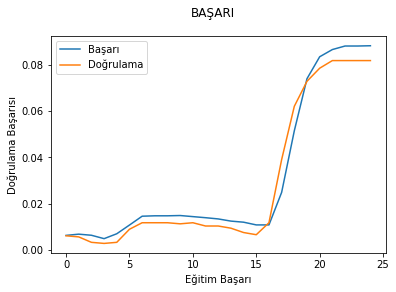

**Şekil 7-)** Başarı Grafiği

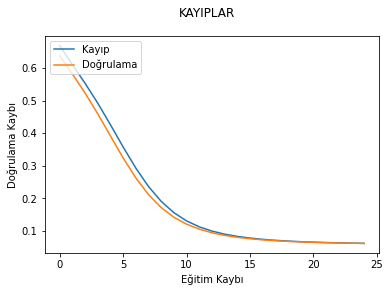

**Şekil 8-)** Kayıp Grafiği

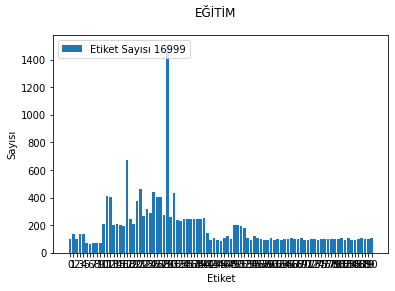

**Şekil 9-)** Eğitim Etiket Grafiği

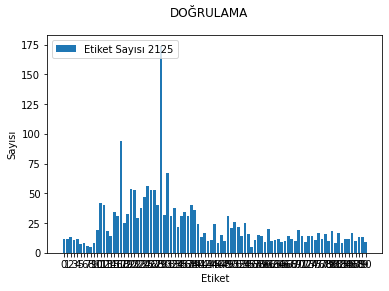

**Şekil 10-)** Doğrulama Etiket Grafiği

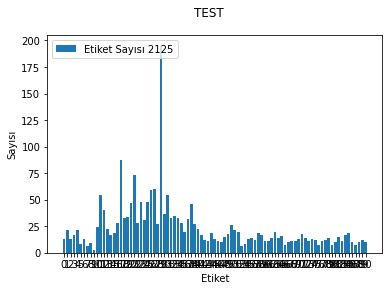

**Şekil 11-)** Test Etiket Grafiği


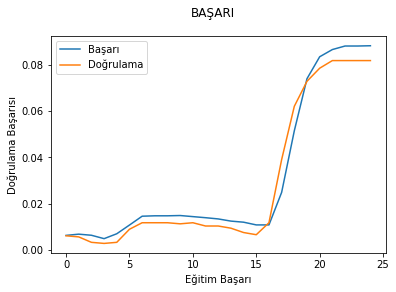

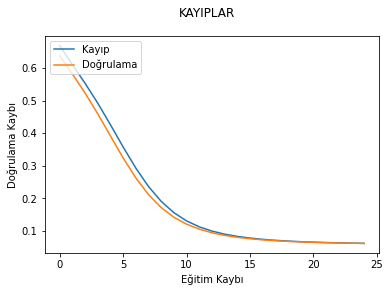

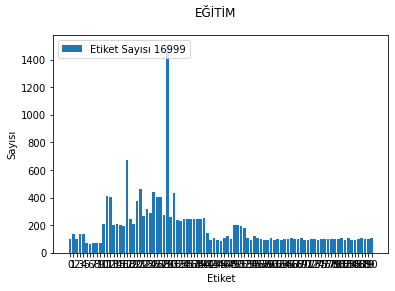

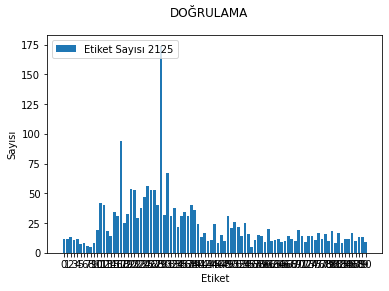

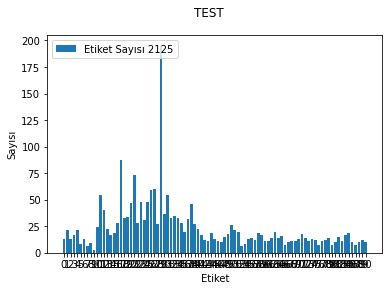

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
%matplotlib inline
class_path = os.path.join('/content','drive','MyDrive','DATASETS','TFLITE','class_name.json')

class_names_file = open(class_path,'r') 
class_names = json.loads(class_names_file.read())
class_names_file.close()

def sum_of_labels(classes:dict,list_of_label:list):
  sum_list = []
  for index in classes.keys():
    temp=0
    for x in list_of_label:
      label = np.argmax(x)
      if int(index) == label:
        temp+=1
    sum_list.append(temp)
  return sum_list

fig = plt.figure()
plt.plot(accuracy,label='BAŞARILAR')
plt.plot(val_accuracy,label='DOĞRULAMA BAŞARI')
fig.suptitle('BAŞARI')
plt.xlabel('Eğitim Başarı')
plt.ylabel('Doğrulama Başarısı')
plt.legend(['Başarı','Doğrulama'],loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(loss,label="KAYIP")
plt.plot(val_loss,label='DOĞRULAMA KAYIP')
fig.suptitle('KAYIPLAR')
plt.xlabel('Eğitim Kaybı')
plt.ylabel('Doğrulama Kaybı')
plt.legend(['Kayıp','Doğrulama'],loc='upper left')
plt.show()

ytrainLabel = sum_of_labels(class_names,y_train)
yValLabel = sum_of_labels(class_names,y_validation)
ytestLabel = sum_of_labels(class_names,y_test)

class_list = list(class_names.keys())

fig = plt.figure()
plt.bar(class_list,ytrainLabel)
fig.suptitle('EĞİTİM')
plt.xlabel('Etiket')
plt.ylabel('Sayısı')
plt.legend([f'Etiket Sayısı {len(y_train)}'],loc='upper left')
plt.show()

fig = plt.figure()
plt.bar(class_list,yValLabel)
fig.suptitle('DOĞRULAMA')
plt.xlabel('Etiket')
plt.legend([f'Etiket Sayısı {len(y_validation)}'],loc='upper left')
plt.ylabel('Sayısı')

plt.show()

fig = plt.figure()
plt.bar(class_list,ytestLabel)
fig.suptitle('TEST')
plt.xlabel('Etiket')
plt.ylabel('Sayısı')
plt.legend([f'Etiket Sayısı {len(y_test)}'],loc='upper left')
plt.show()

### **Modelin Testi**

Eğitilen modelin elimizde bulunan test verilerine göre başarı ve kayıp değerlerini alıyoruz ve çıkan değer gerek mecbur CPU kullanımı gerek Epoch değerinin az kalması sebebiyle düşünülenden düşük çıkıyor. Bir diğer sebebinin de son katmanda yer alan aktivasyonda 'sigmoid' yerine 'softmax' kullanılmasının modeldeki başarı oranını arttıracağı düşünülmektedir.



```
67/67 [==============================] - 22s 333ms/step - loss: 0.0614 - accuracy: 0.0918

Model Test Sonuçları
Test Edilen Model - 2125
Model Başarısı    - 0.09176470339298248
Model Kaybı       - 0.0613749697804451

```



Şekil 12-) Model Testi Sonuçları

In [ ]:
evalute_loss,evalute_acc = diger_model.evaluate(X_test,y_test)

print(f"""
Model Test Sonuçları
Test Edilen Model - {len(y_test)}
Model Başarısı    - {evalute_acc}
Model Kaybı       - {evalute_loss}
""")

67/67 [==============================] - 22s 333ms/step - loss: 0.0614 - accuracy: 0.0918

Model Test Sonuçları
Test Edilen Model - 2125
Model Başarısı    - 0.09176470339298248
Model Kaybı       - 0.0613749697804451

